In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math

In [2]:
data = pd.read_csv("datasets/Absenteeism_at_work.csv", sep=";")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average per day        740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [4]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
model=RandomForestRegressor(n_estimators=250)

In [8]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

MSE: 135.01857649524683


In [10]:
print("R^2:", model.score(X,y))
print("The Training R^2 is:", model.score(X_train, y_train)*100, '%')
print("The Testing R^2 is:", model.score(X_test, y_test)*100, '%')

R^2: 0.6561801562457774
The Training R^2 is: 83.55646435756015 %
The Testing R^2 is: 23.148881671010567 %


In [11]:
feature_imp = pd.Series(model.feature_importances_, index=np.array(X.columns)).sort_values(ascending=False)
feature_imp

Reason for absence                 0.232222
Work load Average per day          0.165865
Age                                0.083561
Month of absence                   0.079009
Hit target                         0.061578
Day of the week                    0.056386
Transportation expense             0.056339
Seasons                            0.042124
Weight                             0.039575
Height                             0.038734
Son                                0.030369
Distance from Residence to Work    0.027689
Body mass index                    0.027389
Service time                       0.020379
Pet                                0.017733
Social drinker                     0.011831
Education                          0.004024
Social smoker                      0.003089
Disciplinary failure               0.002104
dtype: float64

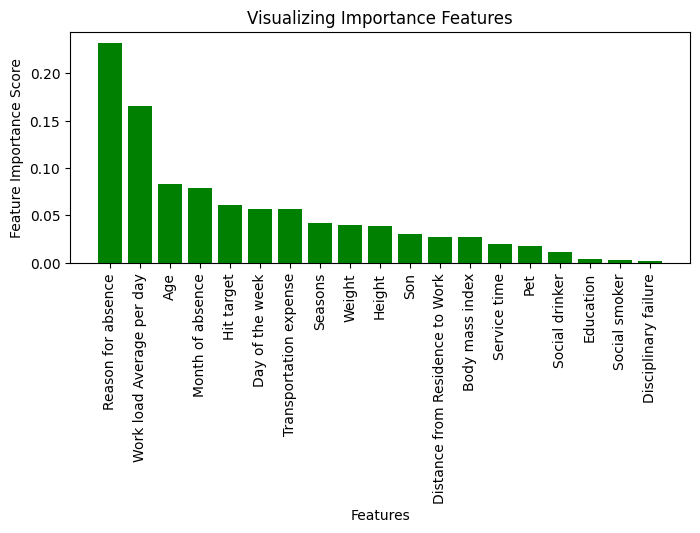

In [12]:
plt.figure(figsize=(8,3))
plt.bar(feature_imp.index, feature_imp, color='g')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Visualizing Importance Features')
plt.xticks(rotation='vertical')
plt.show()

In [13]:
feature_imp[feature_imp > 0.05].sum()

np.float64(0.7349612915432054)

In [14]:
feature_imp_filter = feature_imp[feature_imp > 0.05]
feature_imp_filter

Reason for absence           0.232222
Work load Average per day    0.165865
Age                          0.083561
Month of absence             0.079009
Hit target                   0.061578
Day of the week              0.056386
Transportation expense       0.056339
dtype: float64

In [15]:
feature_imp_filter.index

Index(['Reason for absence', 'Work load Average per day', 'Age',
       'Month of absence', 'Hit target', 'Day of the week',
       'Transportation expense'],
      dtype='object')

In [16]:
X_new = data[feature_imp_filter.index]
y_new = data.iloc[:,-1]

In [17]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=1)

In [18]:
model_new = RandomForestRegressor(n_estimators=100)
model_new.fit(X_train_new, y_train_new)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [19]:
y_pred_new = model_new.predict(X_test_new)

In [20]:
print("MSE: ", metrics.mean_squared_error(y_test_new, y_pred_new))

MSE:  141.13402522995926


In [21]:
print("The R2:", model_new.score(X_new, y_new)*100, '%')
print("The Training R2:", model_new.score(X_train_new, y_train_new)*100, '%')
print("The Training R2:", model_new.score(X_test_new, y_test_new)*100, '%')

The R2: 63.696259601137626 %
The Training R2: 82.2931716860478 %
The Training R2: 19.66803417175701 %


Comments:
+ The model still has overfitting issue.